Importação das bibliotecas utilizadas nesse algoritmo
- Desenvolvido por Davi, Jonathan e Luís Fillype, membros do Laboratório de Processamento de Sinais Biológicos - UFMA

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium 
from folium import plugins
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from  geopy.geocoders import Nominatim

import warnings

warnings.filterwarnings('ignore')

In [2]:
#Leitura do dataset a partir do Pandas, com arquivo local.
#Leitura, também, dos casos confirmados, recuperados e de mortes, a partir do git.
brasil = pd.read_csv("datasetatualizado.csv")


Tratamento de dados faltantes
-

In [4]:
#Transformando strings para Data na feature Date
brasil['date'] = pd.to_datetime(brasil['date'])

#Excluindo o horário do dataset, pois, a priori, é irrelevante.

#Aonde tem dados NAN, faz a substituição por 'Desconhecido'


Panorama geral
- A china mostrou ter recuperado grande parte dos casos, e fica fora da análise. Todavia, países como a Itália, US, Brasil, vão ser analisados

In [8]:
ultimoUpdate = '3/21/20'
ultimoscasos = confirmados
ultimoscasos = ultimoscasos[['Country/Region',ultimoUpdate]]

ultimoscasos = ultimoscasos.groupby('Country/Region').sum().sort_values(by=ultimoUpdate, ascending=False)

ultimoscasos['recuperados'] = recuperados[['Country/Region',ultimoUpdate]].groupby('Country/Region').sum().sort_values(by=ultimoUpdate,ascending=False)

ultimoscasos['mortes'] = mortes[['Country/Region',ultimoUpdate]].groupby('Country/Region').sum().sort_values(by=ultimoUpdate,ascending=False)

ultimoscasos['nao_recuperados'] = ultimoscasos[ultimoUpdate]-ultimoscasos['recuperados']-ultimoscasos['mortes']

ultimoscasos = ultimoscasos.rename(columns={ultimoUpdate:'confirmados'
                                              ,'recuperados':'recuperados'
                                              ,'mortes':'mortes'
                                              ,'nao_recuperados':'nao_recuperados'})

ultimoscasos.style.background_gradient(cmap='Reds')


,confirmados,recuperados,mortes,nao_recuperados
Country/Region,,,,
China,81305,71857,3259,6189
Italy,53578,6072,4825,42681
US,25489,0,307,25182
Spain,25374,2125,1375,21874
Germany,22213,233,84,21896
Iran,20610,7635,1556,11419
France,14431,12,562,13857
"Korea, South",8799,1540,102,7157
Switzerland,6575,15,75,6485


10 Países com mais casos
- Nessa seção evidencia-se que a Itália teve um pico bastante alto nos últimos dias, mostrando também a evolução dos casos ao longo do tempo.



In [9]:
top_10_confirmado = confirmados[(confirmados['Country/Region']=='Brazil') |
                             (confirmados['Country/Region']=='Italy') | 
                             (confirmados['Country/Region']=='Spain') | 
                             (confirmados['Country/Region']=='Germany') |
                             (confirmados['Country/Region']=='Iran') |
                             (confirmados['Country/Region']=='US') |
                             (confirmados['Country/Region']=='France') |
                             (confirmados['Country/Region']=='Korea,South') |
                             (confirmados['Country/Region']=='Switzerland') |
                             (confirmados['Country/Region']=='United Kingdom') |
                             (confirmados['Country/Region']=='Ntherlands')]

top_10_confirmado = top_10_confirmado.groupby(top_10_confirmado['Country/Region']).sum()

top_10_confirmado = top_10_confirmado.drop(['Lat','Long'], axis = 1)
top_10_confirmado = top_10_confirmado.transpose()


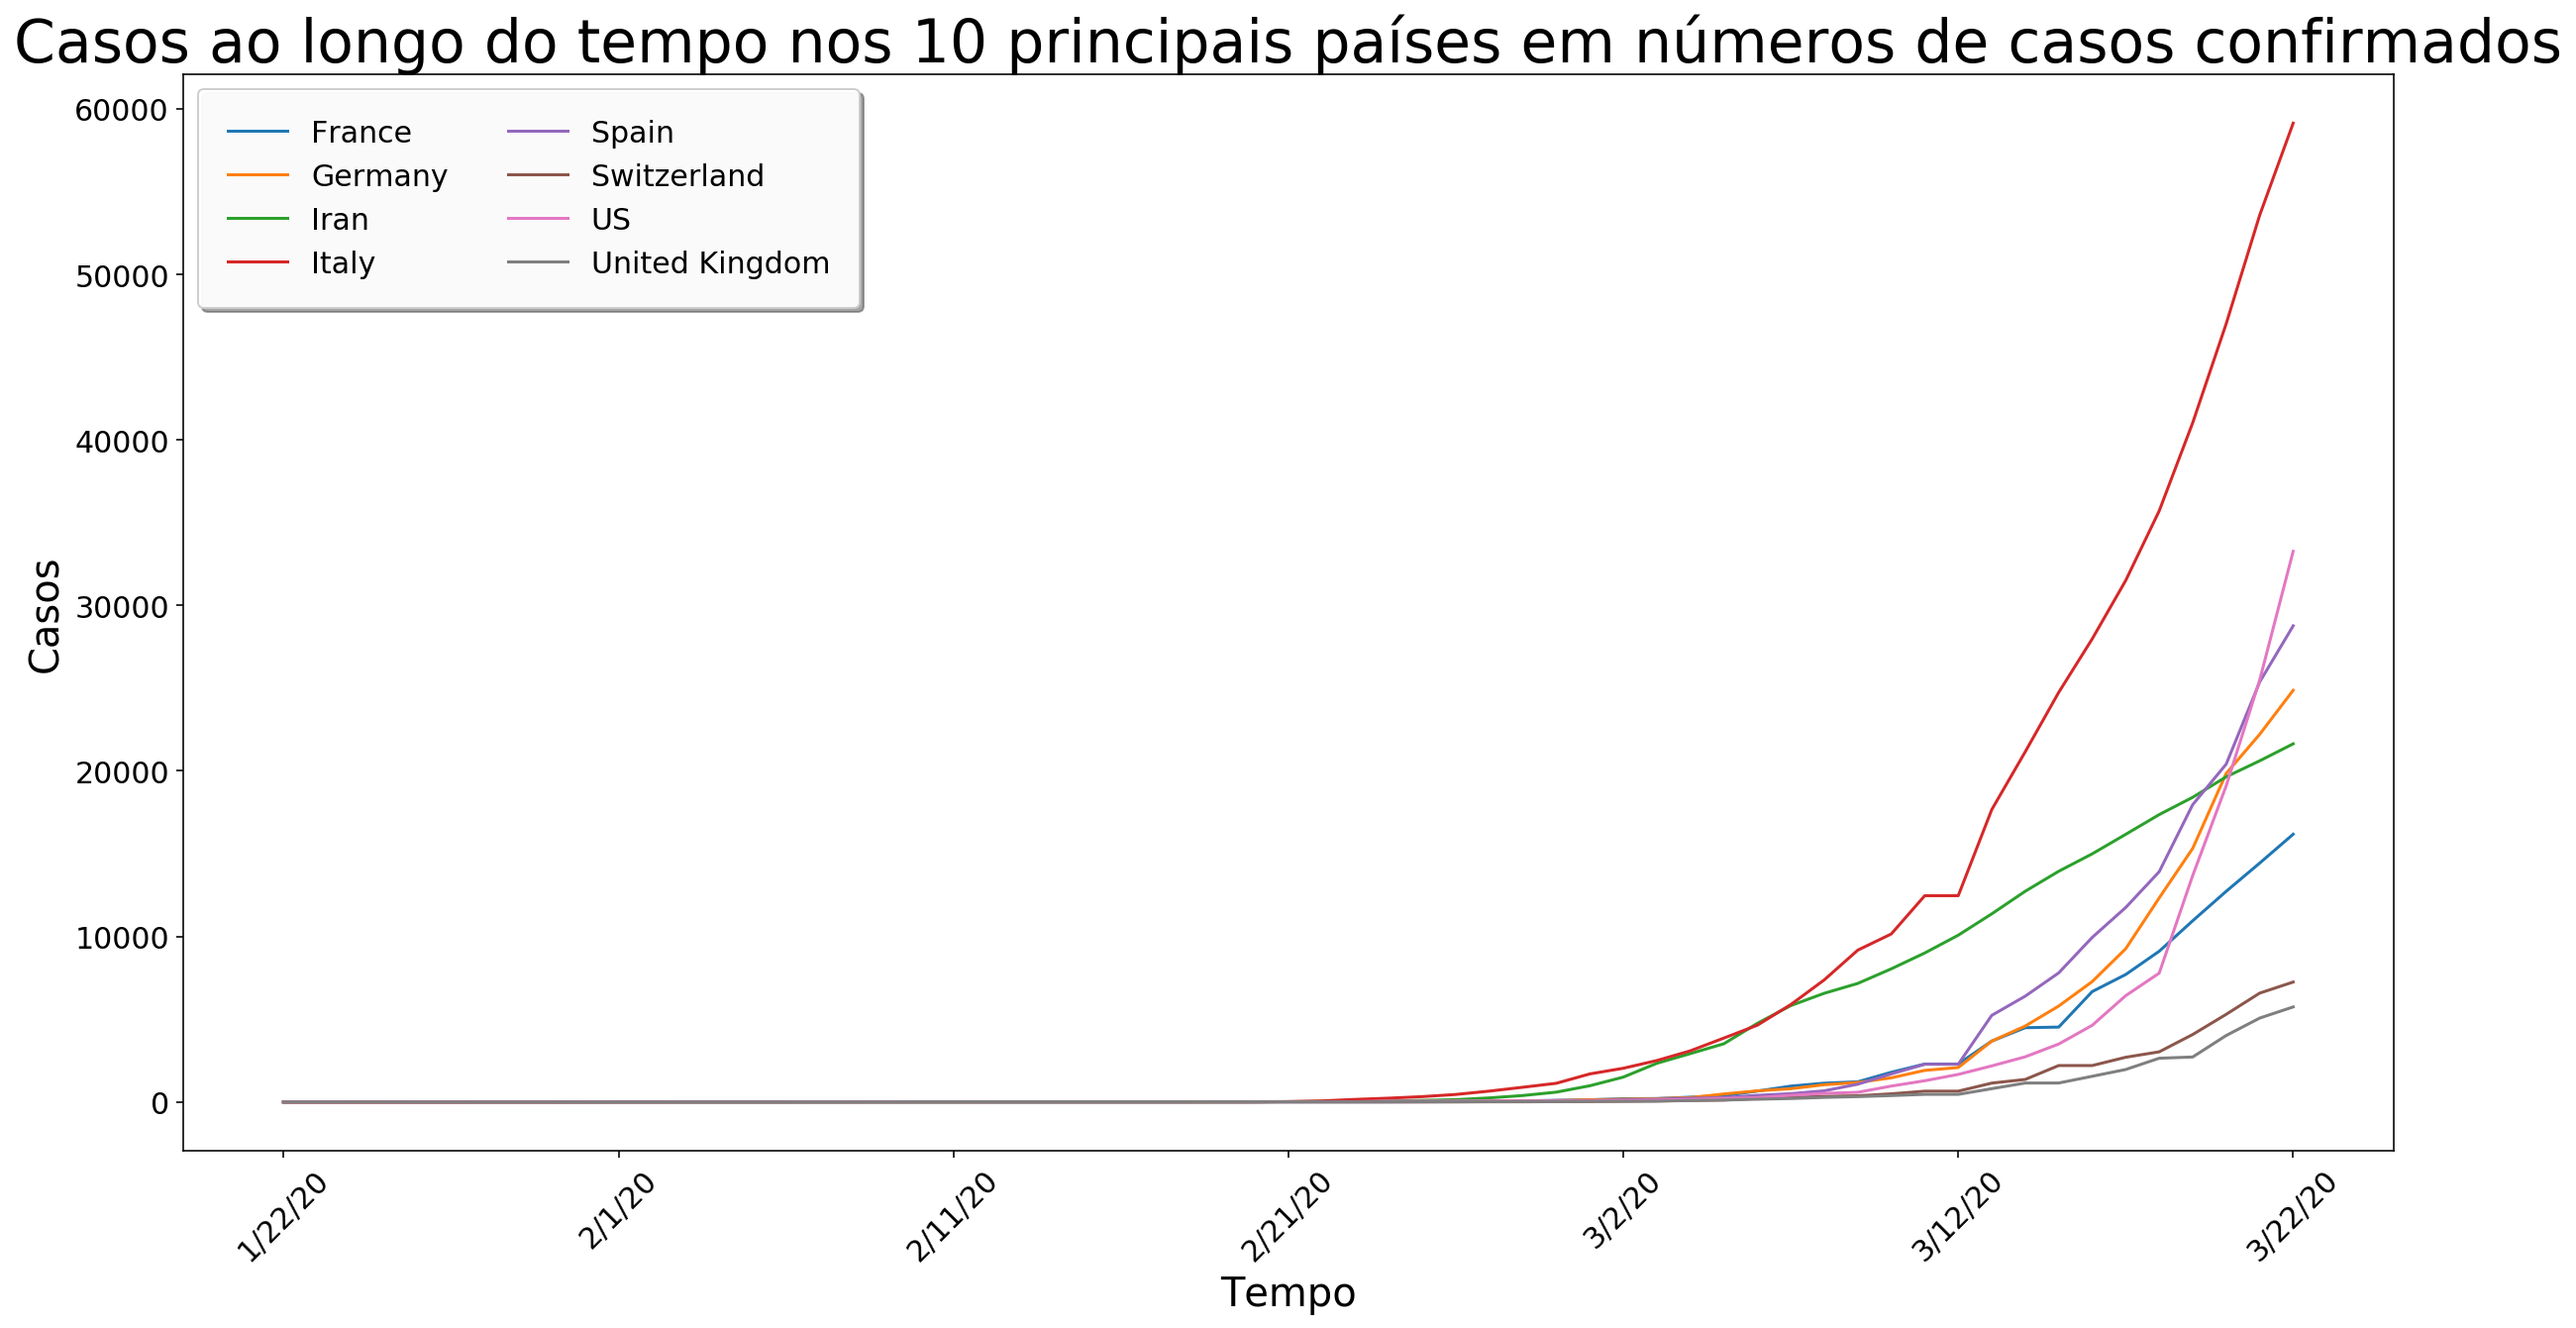

In [10]:
top_10_paises = top_10_confirmado.drop('Brazil', axis = 1)

# Criando o plot
top_10_paises.plot(kind='line', figsize=(20,10))

# Definição dos títulos, labels e etc.
plt.title('Casos ao longo do tempo nos 10 principais países em números de casos confirmados', size=30)
plt.xlabel('Tempo', size=20)
plt.ylabel('Casos', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

Brasil en relação aos outros países com casos confirmados
- Mostra-se que o Brasil está com uma evolução acelerada em relação ao seu primeiro caso

In [11]:
top10_desde_primeirocaso = top_10_confirmado.reset_index()
top10_desde_primeirocaso = top10_desde_primeirocaso.drop('index',axis=1)
top10_desde_primeirocaso['Brazil'] = top10_desde_primeirocaso['Brazil'].shift(-35)
top10_desde_primeirocaso['France'] = top10_desde_primeirocaso['France'].shift(-2)
top10_desde_primeirocaso['Germany'] = top10_desde_primeirocaso['Germany'].shift(-5)
top10_desde_primeirocaso['Iran'] = top10_desde_primeirocaso['Iran'].shift(-28)
top10_desde_primeirocaso['Italy'] = top10_desde_primeirocaso['Italy'].shift(-9)
top10_desde_primeirocaso['Spain'] = top10_desde_primeirocaso['Spain'].shift(-10)
top10_desde_primeirocaso['Switzerland'] = top10_desde_primeirocaso['Switzerland'].shift(-34)
top10_desde_primeirocaso['United Kingdom'] = top10_desde_primeirocaso['United Kingdom'].shift(-9)

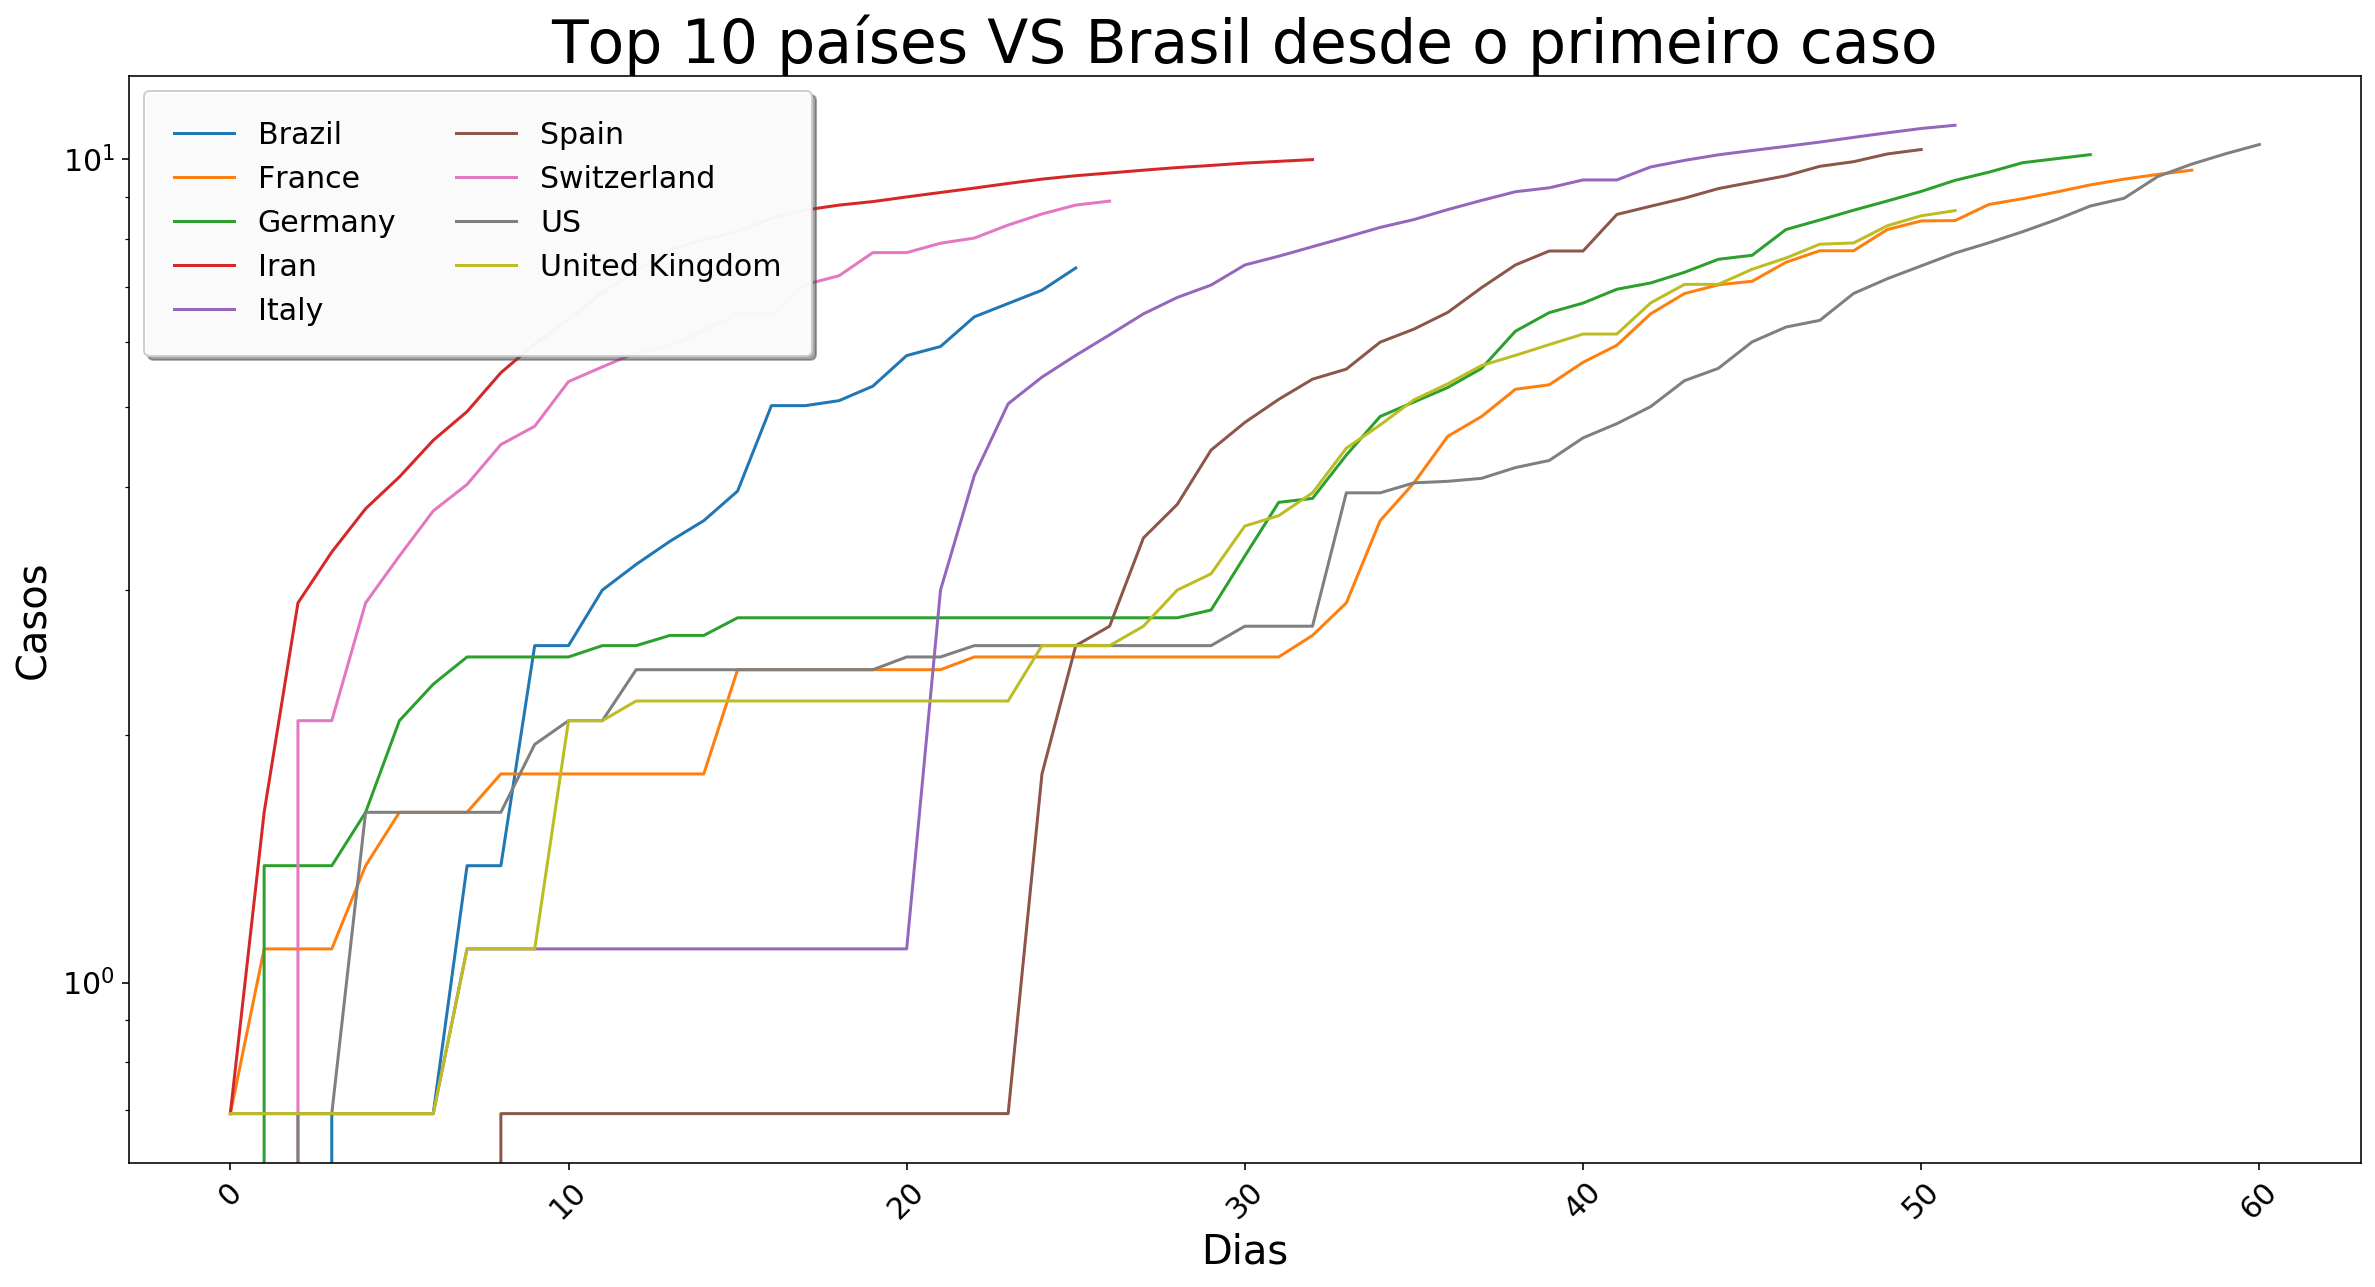

In [12]:
# Criação do plot
top10_desde_primeirocaso_log = np.log(top10_desde_primeirocaso)

top10_desde_primeirocaso_log.plot(kind='line', figsize=(20,10))

#Definindo parâmetros do Plot
plt.title('Top 10 países VS Brasil desde o primeiro caso', size=30)
plt.xlabel('Dias', size=20)
plt.ylabel('Casos', size=20)
plt.xticks(rotation=45, size=15)
plt.yticks(size=15)
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 2 
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

plt.yscale('log',basey=10) 

Situação nos Estados do Brasil
- Conclusões
São Paulo, atualmente, lidera os casos confirmados. Em relação aos casos suspeitos, nota-se que São Paulo e Minas Gerais lideram também, com um provável aumento de casos confirmados nos próximos dias nessas cidades.

In [14]:
porEstado = brasil[['suspects','refuses','cases','deaths']][brasil['date']=='2020-03-21'].groupby(brasil['state']).max().sort_values(by = 'cases', ascending=False)
porEstado.style.background_gradient(cmap='Reds')

,suspects,refuses,cases,deaths
state,,,,
São Paulo,0,0,459,15
Rio de Janeiro,0,0,119,3
Distrito Federal,2717,1485,108,0
Ceará,0,0,84,0
Rio Grande do Sul,295,495,61,0
Minas Gerais,5862,0,55,0
Santa Catarina,361,0,51,0
Paraná,273,172,43,0
Bahia,1068,535,41,0


Plot em relação ao número de casos e mortes, no Brasil
-


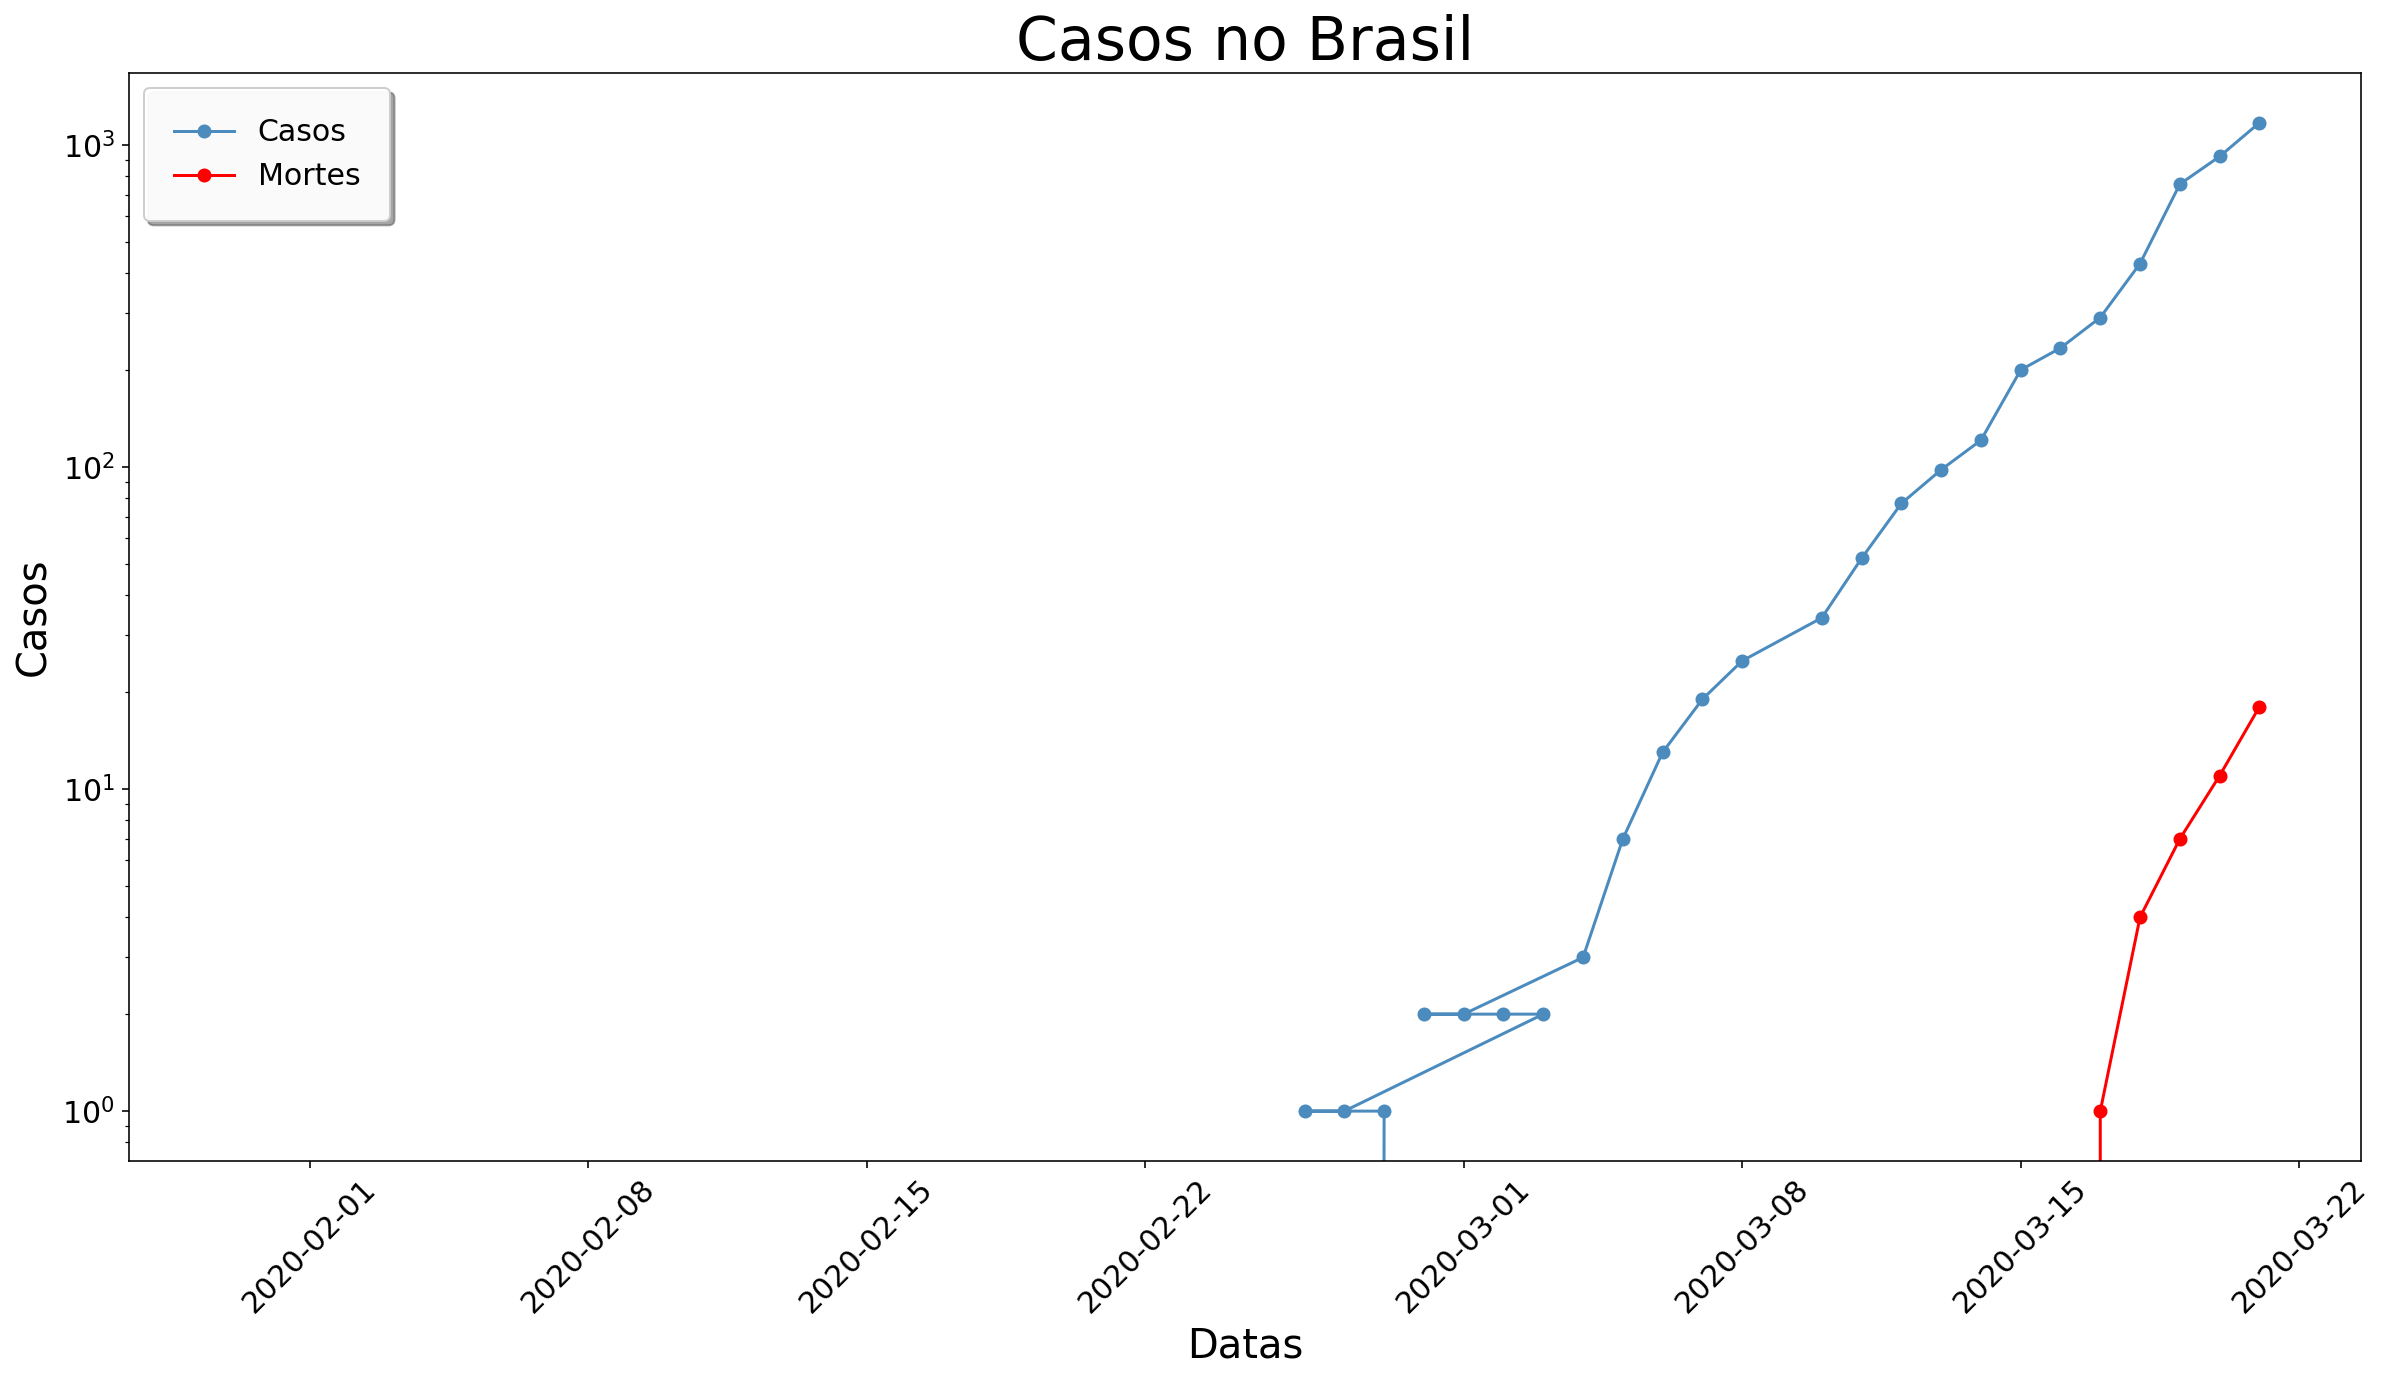

In [15]:
porEstadoAoLongoDoTempo = brasil[['cases','deaths']].groupby(brasil['date']).sum().sort_values(by = 'cases', ascending=True)

# Definindo o tamanho do plot
plt.figure(figsize=(20,10))

# Criando o lineplot de casos
plt.plot(porEstadoAoLongoDoTempo['cases']
        , color = '#4b8bbe'
        , label = 'Casos'
        , marker = 'o')

# Criando o lineplot de mortes
plt.plot(porEstadoAoLongoDoTempo['deaths']
        , color = 'red'
        , label = 'Mortes'
        , marker = 'o')

plt.title('Casos no Brasil',size=30)
plt.ylabel('Casos',size=20)
plt.xlabel('Datas',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

#Legendas
plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

plt.yscale('log',basey=10) 



Casos em SP
-

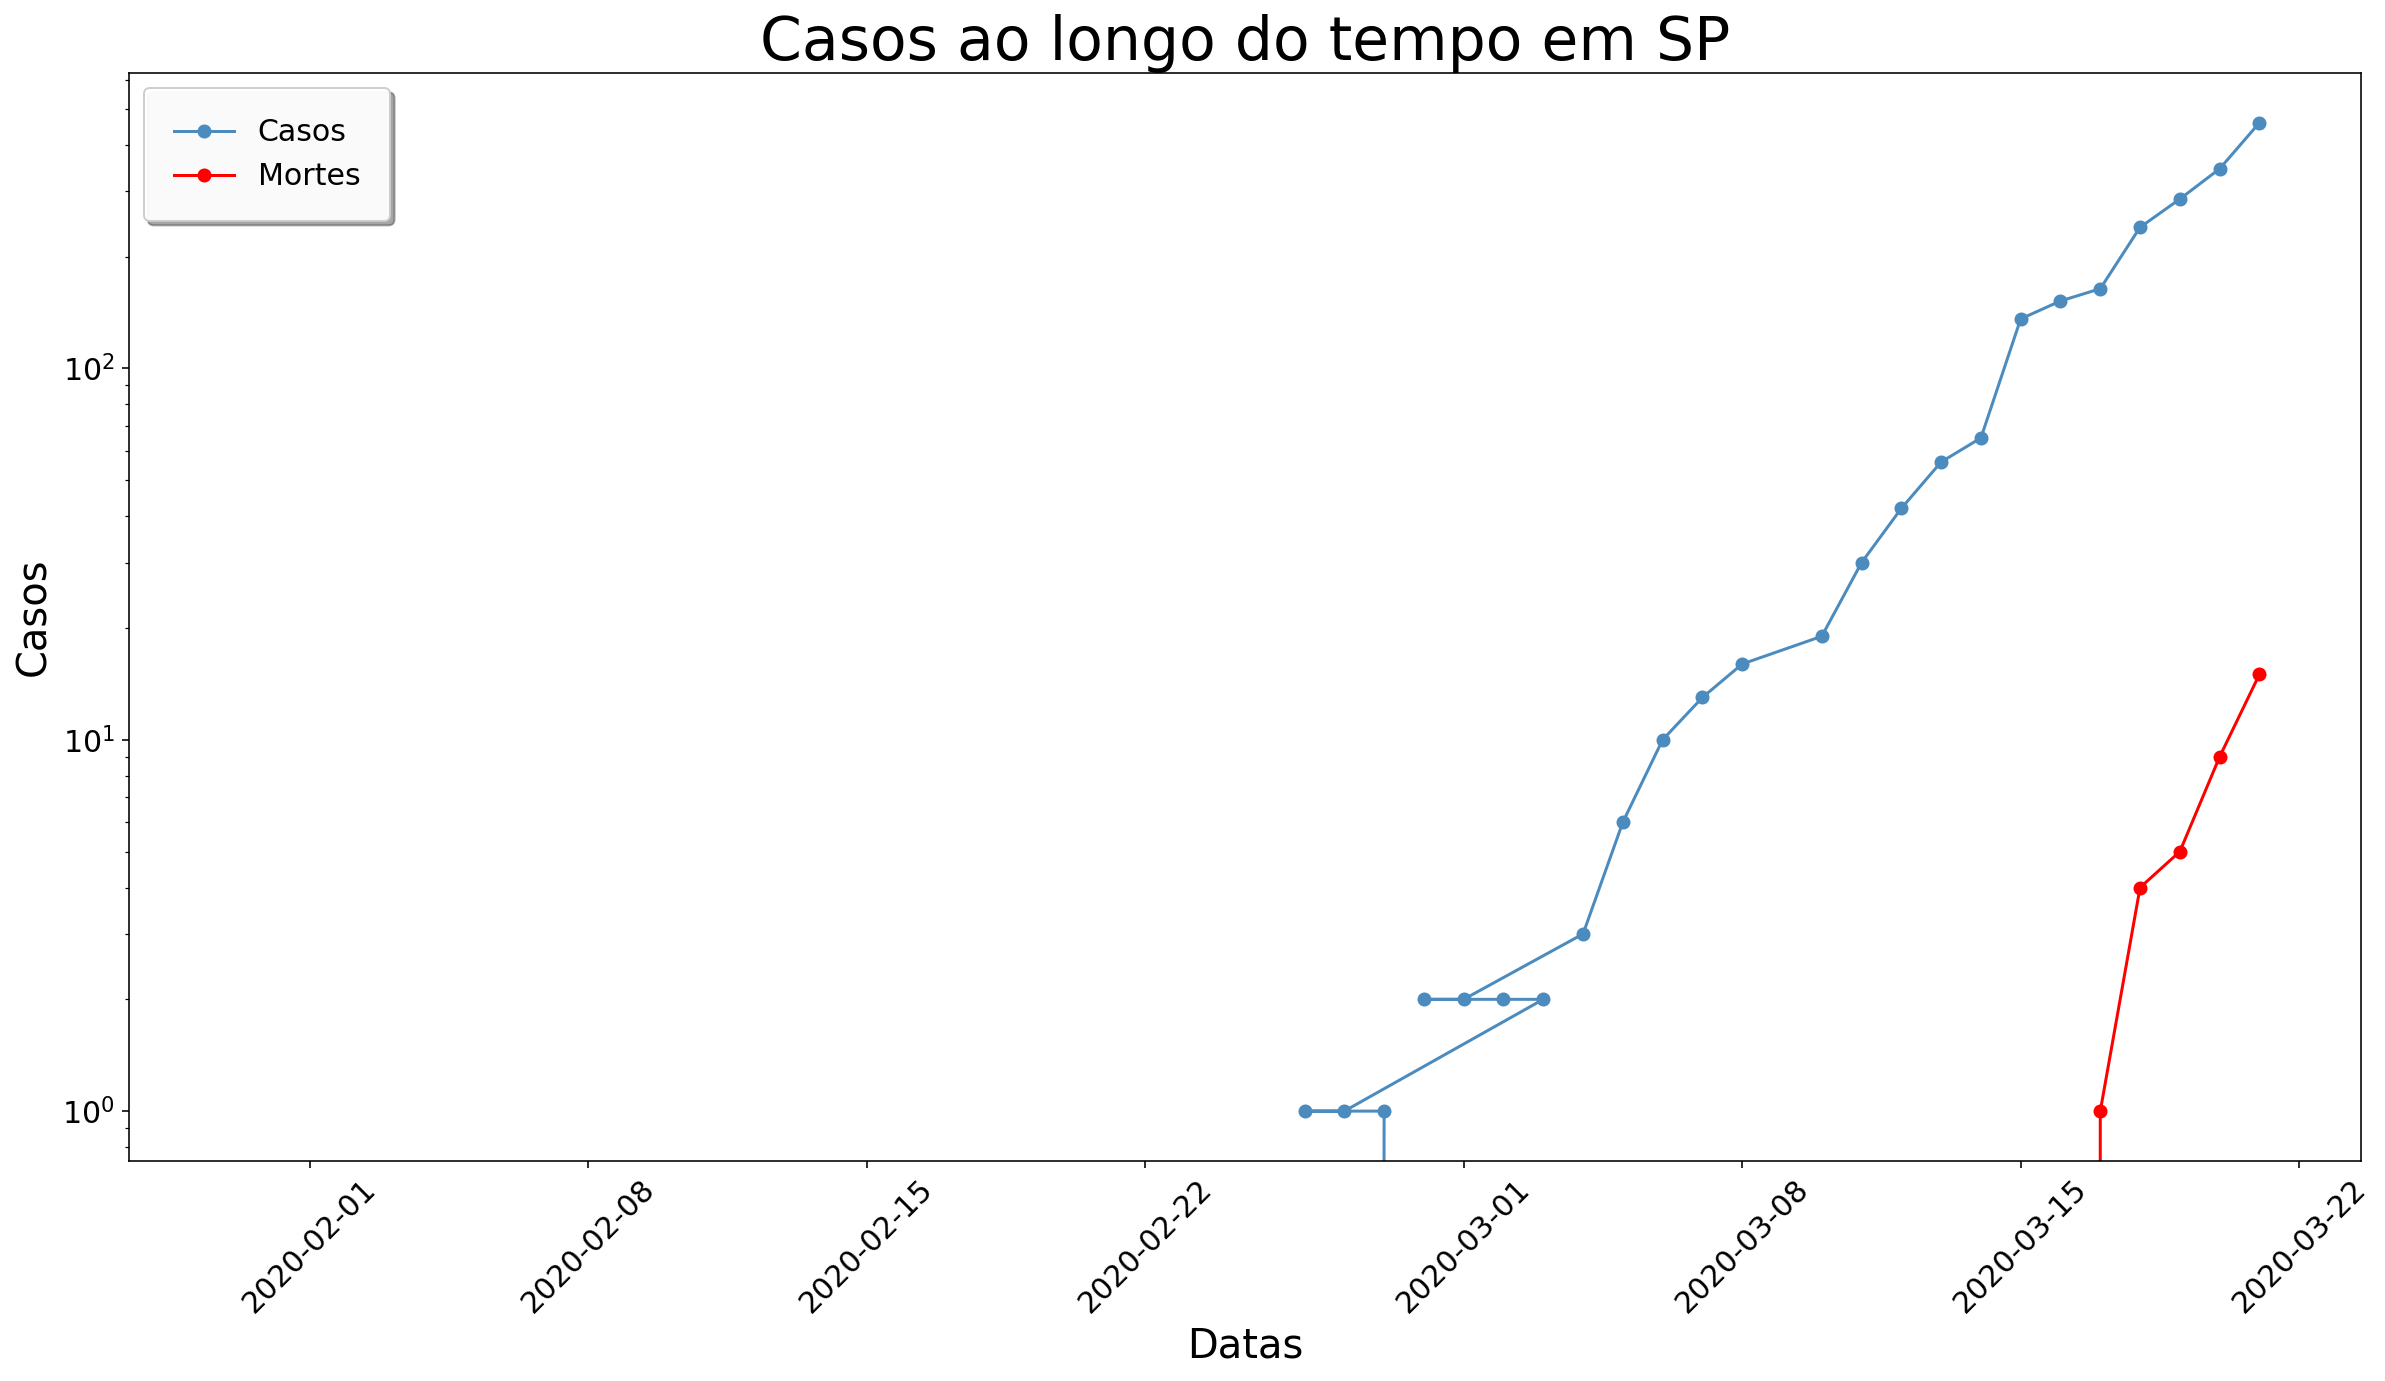

In [16]:
SPAoLongoDoTempo = brasil[['cases','deaths']][brasil['state']=='São Paulo'].groupby(brasil['date']).sum().sort_values(by = 'cases', ascending=True)


plt.figure(figsize=(20,10))
plt.plot(SPAoLongoDoTempo['cases']
        , color = '#4b8bbe'
        , label = 'Casos'
        , marker = 'o')

plt.plot(SPAoLongoDoTempo['deaths']
        , color = 'red'
        , label = 'Mortes'
        , marker = 'o')

plt.title('Casos ao longo do tempo em SP',size=30)
plt.ylabel('Casos',size=20)
plt.xlabel('Datas',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)

plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);

plt.yscale('log',basey=10) 


In [18]:
top_10_confirmado = confirmados.groupby(confirmados['Country/Region']).sum()
top_10_confirmado = top_10_confirmado.drop(['Lat','Long'], axis = 1)
top_10_confirmado = top_10_confirmado.transpose()
top_10_confirmado[top_10_confirmado==0] = np.nan

paises = top_10_confirmado.isna().sum()<=5
paises = paises.index[paises==True]

top_10_confirmado = top_10_confirmado[paises].drop('China', axis = 1)

colunas = top_10_confirmado.columns

for i in colunas:
    n = top_10_confirmado[i].isna().sum()
    top_10_confirmado[i] = top_10_confirmado[i].shift(-n)
    
top_10_confirmado.tail(20)

Country/Region,Australia,Cambodia,Canada,France,Germany,Japan,"Korea, South",Malaysia,Nepal,Singapore,Sri Lanka,Taiwan*,Thailand,US,Vietnam
3/3/20,63.0,2.0,54.0,380.0,1040.0,293,5186,83.0,1.0,110.0,1.0,42,43,118,16.0
3/4/20,76.0,2.0,64.0,656.0,1176.0,331,5621,93.0,1.0,117.0,1.0,42,43,149,16.0
3/5/20,91.0,2.0,77.0,957.0,1457.0,360,6088,99.0,1.0,130.0,1.0,44,47,217,16.0
3/6/20,107.0,3.0,79.0,1134.0,1908.0,420,6593,117.0,1.0,138.0,2.0,45,48,262,18.0
3/7/20,128.0,3.0,108.0,1217.0,2078.0,461,7041,129.0,1.0,150.0,2.0,45,50,402,30.0
3/8/20,128.0,5.0,117.0,1792.0,3675.0,502,7314,149.0,1.0,150.0,6.0,45,50,518,30.0
3/9/20,200.0,7.0,193.0,2290.0,4585.0,511,7478,149.0,1.0,160.0,10.0,45,50,583,31.0
3/10/20,250.0,7.0,198.0,2290.0,5795.0,581,7513,197.0,1.0,178.0,18.0,47,53,959,38.0
3/11/20,297.0,7.0,252.0,3678.0,7272.0,639,7755,238.0,1.0,178.0,28.0,48,59,1281,39.0
3/12/20,377.0,33.0,415.0,4487.0,9257.0,639,7869,428.0,1.0,200.0,44.0,49,70,1663,47.0


In [19]:
top_10_confirmado = top_10_confirmado.drop(['Cambodia','Nepal','Sri Lanka'],axis=1)

In [20]:
top_10_confirmado['Brazil'] = np.nan
top_10_confirmado['Brazil'].iloc[0:24] = porEstadoAoLongoDoTempo['cases'].iloc[27:top_10_confirmado.shape[0]].values
top_10_confirmado = top_10_confirmado.reset_index().drop('index',axis=1).iloc[0:50]
top_10_confirmado.head()


Country/Region,Australia,Canada,France,Germany,Japan,"Korea, South",Malaysia,Singapore,Taiwan*,Thailand,US,Vietnam,Brazil
0,4.0,1.0,2.0,1.0,2,1,3.0,1.0,1,2,1,2.0,1.0
1,5.0,1.0,3.0,4.0,1,1,4.0,3.0,1,3,1,2.0,1.0
2,5.0,2.0,3.0,4.0,2,2,4.0,3.0,3,5,2,2.0,1.0
3,6.0,2.0,3.0,4.0,2,2,4.0,4.0,3,7,2,2.0,2.0
4,9.0,2.0,4.0,5.0,4,3,7.0,5.0,4,8,5,2.0,2.0


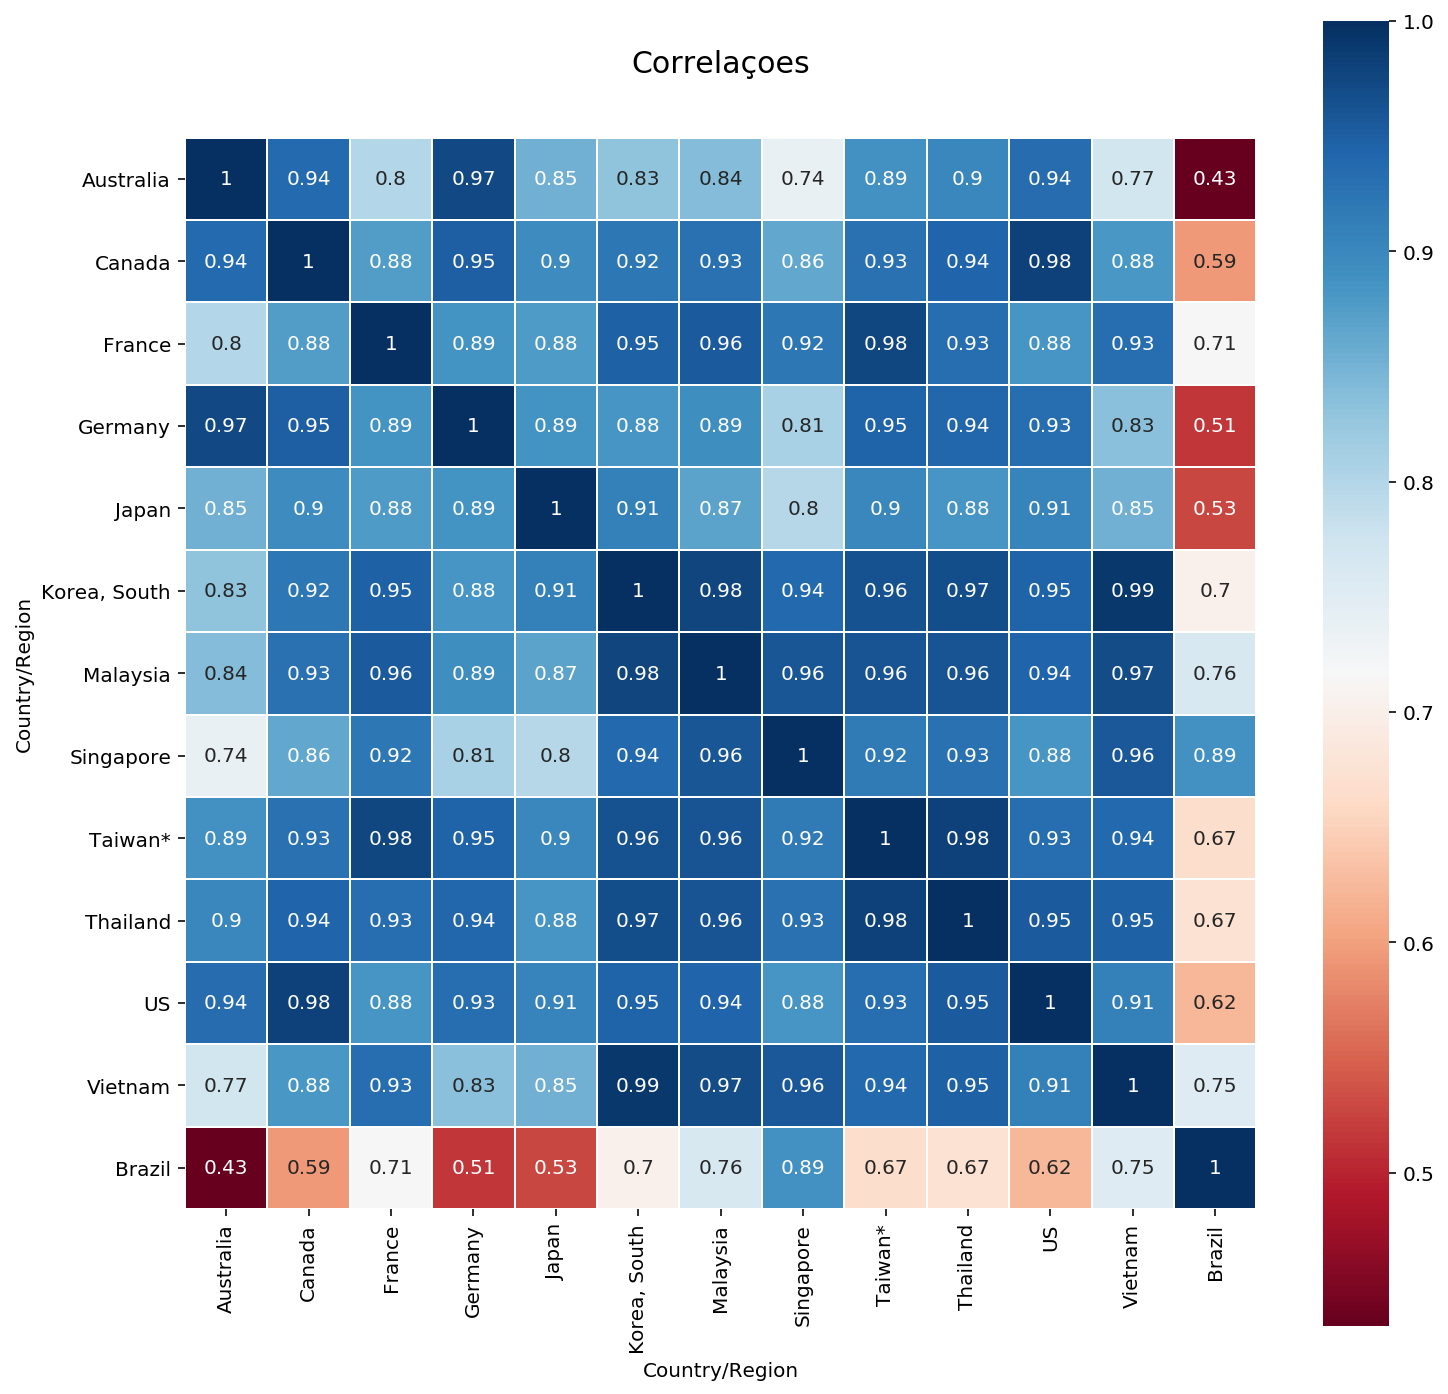

In [21]:
visu = top_10_confirmado.iloc[0:24]

colormap = plt.cm.RdBu 
plt.title('Correlaçoes', y=1.05, size=15) 
sns.heatmap(visu.astype(float).corr(),linewidths=0.5,vmax=1, 
            square=True, cmap=colormap, linecolor='white', annot=True);

In [23]:
colunas = top_10_confirmado.columns[0:13].drop('Brazil')


for i in colunas:
    top_10_confirmado[str('cases_per_day_'+i)] = top_10_confirmado[i]-top_10_confirmado[i].shift(1)
    top_10_confirmado[str('rolling_mean_'+i)] = top_10_confirmado[i].rolling(3).mean()
    
top_10_confirmado = top_10_confirmado.fillna(0)
top_10_confirmado.tail(10)

Country/Region,Australia,Canada,France,Germany,Japan,"Korea, South",Malaysia,Singapore,Taiwan*,Thailand,...,cases_per_day_Singapore,rolling_mean_Singapore,cases_per_day_Taiwan*,rolling_mean_Taiwan*,cases_per_day_Thailand,rolling_mean_Thailand,cases_per_day_US,rolling_mean_US,cases_per_day_Vietnam,rolling_mean_Vietnam
40,60.0,49.0,288.0,799.0,274,4335,50.0,110.0,41,43,...,2.0,108.000000,1.0,40.000000,1.0,42.333333,24.0,80.000000,0.0,16.000000
41,63.0,54.0,380.0,1040.0,293,5186,83.0,110.0,42,43,...,0.0,109.333333,1.0,41.000000,0.0,42.666667,20.0,96.666667,0.0,16.000000
42,76.0,64.0,656.0,1176.0,331,5621,93.0,117.0,42,43,...,7.0,112.333333,0.0,41.666667,0.0,43.000000,31.0,121.666667,0.0,16.000000
43,91.0,77.0,957.0,1457.0,360,6088,99.0,130.0,44,47,...,13.0,119.000000,2.0,42.666667,4.0,44.333333,68.0,161.333333,0.0,16.000000
44,107.0,79.0,1134.0,1908.0,420,6593,117.0,138.0,45,48,...,8.0,128.333333,1.0,43.666667,1.0,46.000000,45.0,209.333333,2.0,16.666667
45,128.0,108.0,1217.0,2078.0,461,7041,129.0,150.0,45,50,...,12.0,139.333333,0.0,44.666667,2.0,48.333333,140.0,293.666667,12.0,21.333333
46,128.0,117.0,1792.0,3675.0,502,7314,149.0,150.0,45,50,...,0.0,146.000000,0.0,45.000000,0.0,49.333333,116.0,394.000000,0.0,26.000000
47,200.0,193.0,2290.0,4585.0,511,7478,149.0,160.0,45,50,...,10.0,153.333333,0.0,45.000000,0.0,50.000000,65.0,501.000000,1.0,30.333333
48,250.0,198.0,2290.0,5795.0,581,7513,197.0,178.0,47,53,...,18.0,162.666667,2.0,45.666667,3.0,51.000000,376.0,686.666667,7.0,33.000000
49,297.0,252.0,3678.0,7272.0,639,7755,238.0,178.0,48,59,...,0.0,172.000000,1.0,46.666667,6.0,54.000000,322.0,941.000000,1.0,36.000000


Engenharia de features
-

In [24]:
colunas = top_10_confirmado.columns[0:13].drop('Brazil')


for i in colunas:
    top_10_confirmado[str('cases_per_day_'+i)] = top_10_confirmado[i]-top_10_confirmado[i].shift(1)
    top_10_confirmado[str('rolling_mean_'+i)] = top_10_confirmado[i].rolling(3).mean()
    
top_10_confirmado = top_10_confirmado.fillna(0)
top_10_confirmado.tail(10)

Country/Region,Australia,Canada,France,Germany,Japan,"Korea, South",Malaysia,Singapore,Taiwan*,Thailand,...,cases_per_day_Singapore,rolling_mean_Singapore,cases_per_day_Taiwan*,rolling_mean_Taiwan*,cases_per_day_Thailand,rolling_mean_Thailand,cases_per_day_US,rolling_mean_US,cases_per_day_Vietnam,rolling_mean_Vietnam
40,60.0,49.0,288.0,799.0,274,4335,50.0,110.0,41,43,...,2.0,108.000000,1.0,40.000000,1.0,42.333333,24.0,80.000000,0.0,16.000000
41,63.0,54.0,380.0,1040.0,293,5186,83.0,110.0,42,43,...,0.0,109.333333,1.0,41.000000,0.0,42.666667,20.0,96.666667,0.0,16.000000
42,76.0,64.0,656.0,1176.0,331,5621,93.0,117.0,42,43,...,7.0,112.333333,0.0,41.666667,0.0,43.000000,31.0,121.666667,0.0,16.000000
43,91.0,77.0,957.0,1457.0,360,6088,99.0,130.0,44,47,...,13.0,119.000000,2.0,42.666667,4.0,44.333333,68.0,161.333333,0.0,16.000000
44,107.0,79.0,1134.0,1908.0,420,6593,117.0,138.0,45,48,...,8.0,128.333333,1.0,43.666667,1.0,46.000000,45.0,209.333333,2.0,16.666667
45,128.0,108.0,1217.0,2078.0,461,7041,129.0,150.0,45,50,...,12.0,139.333333,0.0,44.666667,2.0,48.333333,140.0,293.666667,12.0,21.333333
46,128.0,117.0,1792.0,3675.0,502,7314,149.0,150.0,45,50,...,0.0,146.000000,0.0,45.000000,0.0,49.333333,116.0,394.000000,0.0,26.000000
47,200.0,193.0,2290.0,4585.0,511,7478,149.0,160.0,45,50,...,10.0,153.333333,0.0,45.000000,0.0,50.000000,65.0,501.000000,1.0,30.333333
48,250.0,198.0,2290.0,5795.0,581,7513,197.0,178.0,47,53,...,18.0,162.666667,2.0,45.666667,3.0,51.000000,376.0,686.666667,7.0,33.000000
49,297.0,252.0,3678.0,7272.0,639,7755,238.0,178.0,48,59,...,0.0,172.000000,1.0,46.666667,6.0,54.000000,322.0,941.000000,1.0,36.000000


Dividindo o dataset em Treino e Teste
-

In [5]:
x_treino = brasil.iloc[0:38]
y_treino = brasil.iloc[0:38]

x_teste = brasil.iloc[38:77]

In [6]:
regressao = LinearRegression()
regressao.fit(x_treino, y_treino)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [27]:

y_pred_treino = regressao.predict(x_treino)
y_pred_teste = regressao.predict(x_teste)

In [29]:
print('Erro absoluto médio:', metrics.mean_absolute_error(y_treino, y_pred_treino))
print('Erro médio Quadrático:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))
print()
print("A média do dataset de treino é ")
print(y_treino.mean())
print()
print("Relação")
print(round(metrics.mean_absolute_error(y_treino, y_pred_treino)/y_treino.mean()*100,2)) 

Erro absoluto médio: 6.257216966787382e-13
Erro médio Quadrático: 7.587189311941469e-13

A média do dataset de treino é 
185.79166666666666

Relação
0.0


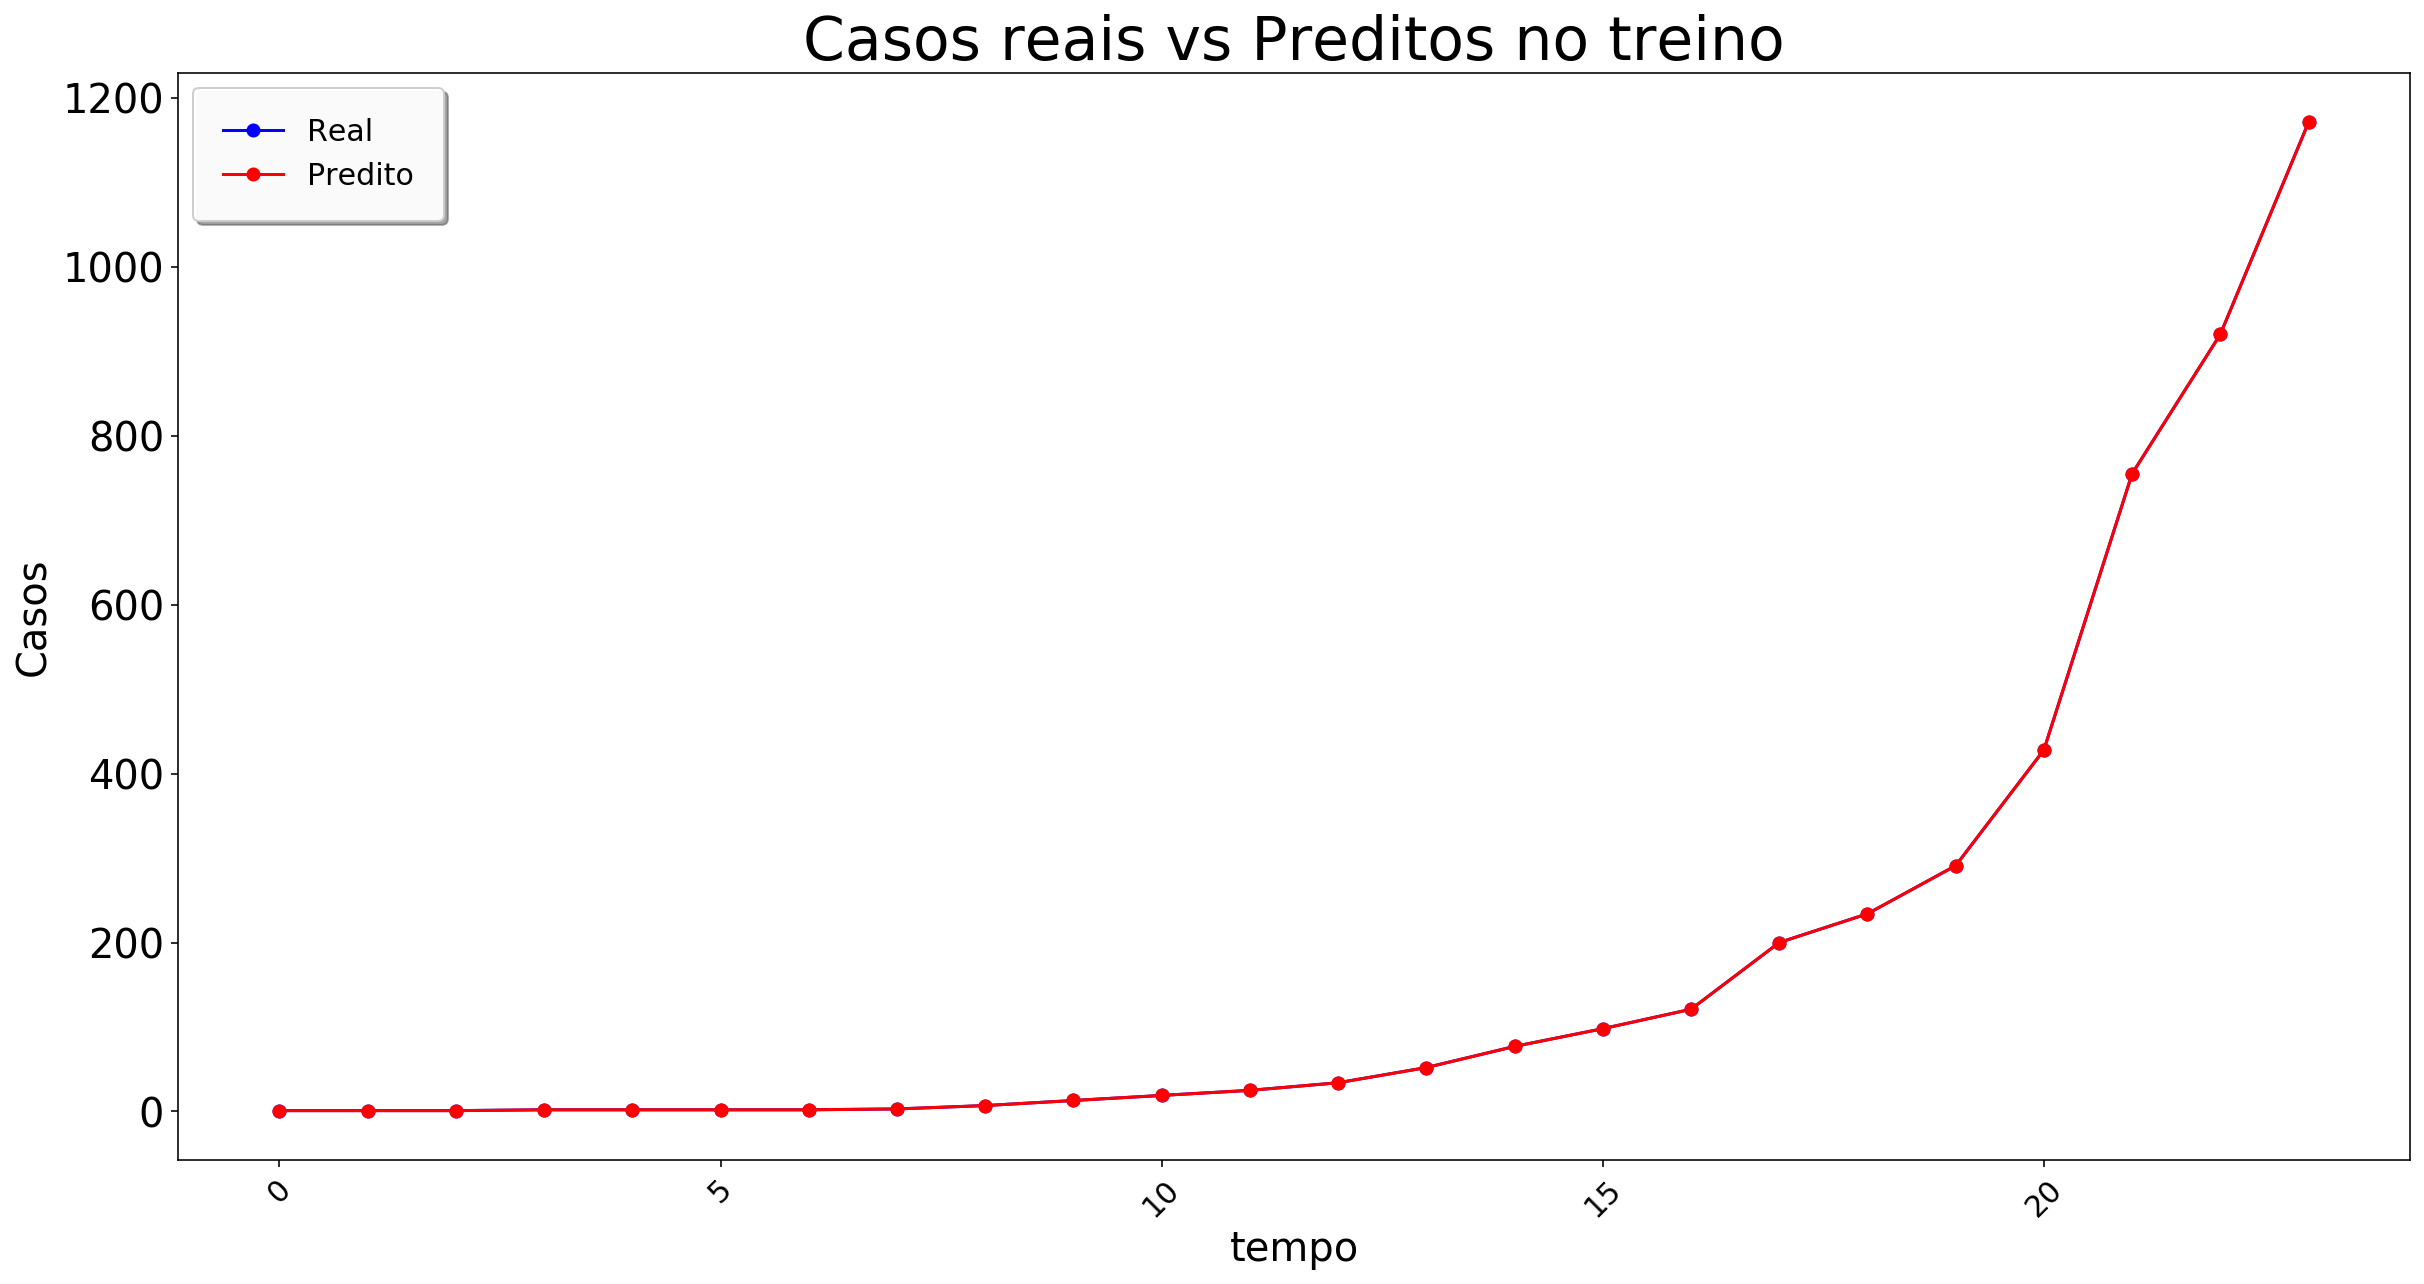

In [33]:
#Predição

plt.figure(figsize=(20,10))

plt.plot(y_treino
        , color = 'blue'
        , label = 'Real'
        , marker = 'o')

plt.plot(y_pred_treino
        , color = 'red'
        , label = 'Predito'
        , marker = 'o')


plt.title('Casos reais vs Preditos no treino',size=30)
plt.ylabel('Casos',size=20)
plt.xlabel('tempo',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)


plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);


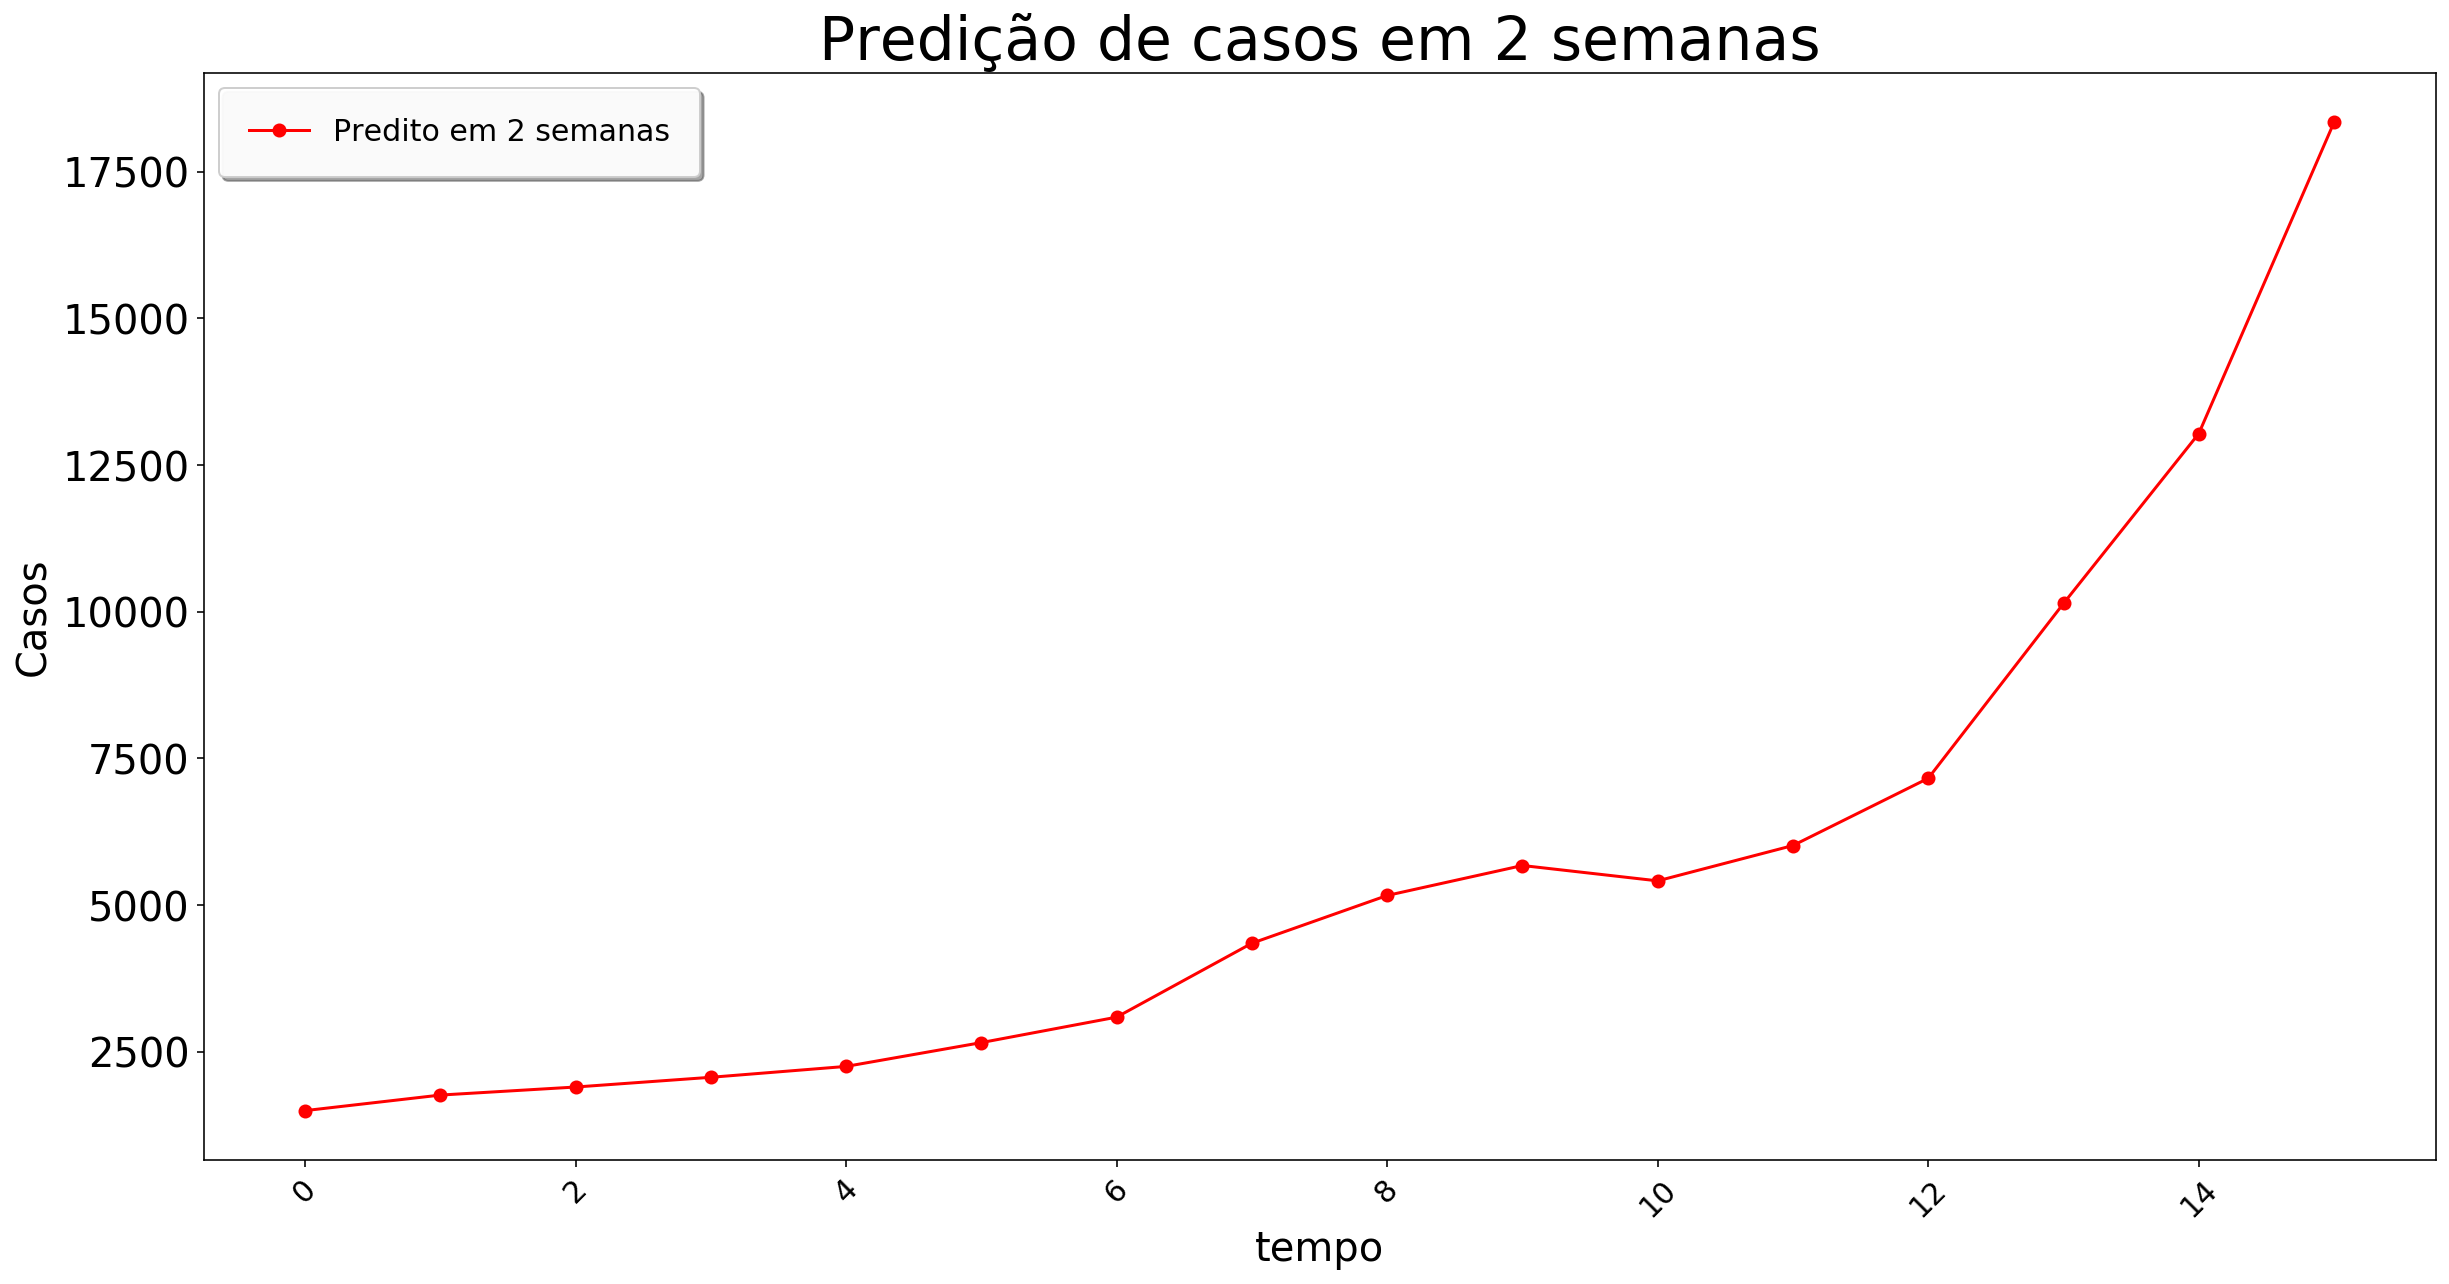

In [34]:
plt.figure(figsize=(20,10))


plt.plot(y_pred_teste
        , color = 'red'
        , label = 'Predito em 2 semanas'
        , marker = 'o')


plt.title('Predição de casos em 2 semanas',size=30)
plt.ylabel('Casos',size=20)
plt.xlabel('tempo',size=20)
plt.xticks(rotation=45,size=15)
plt.yticks(size=20)


plt.legend(loc = "upper left"
           , frameon = True
           , fontsize = 15
           , ncol = 1
           , fancybox = True
           , framealpha = 0.95
           , shadow = True
           , borderpad = 1);



In [38]:
regressao.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [40]:
regressao.intercept_

28.21546135706035